In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
# specifically for cnn

from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D
from keras.utils import np_utils
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.vgg16 import VGG16

import skimage.io as io

In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
#from zipfile import ZipFile
#with ZipFile('/content/gdrive/My Drive/ML/Data_set/Plant seedings/test.zip', 'r') as z:
#    z.extractall('/content/gdrive/My Drive/ML/Data_set/Plant seedings/test_set')
    #z.printdir()
#    z.close()

In [29]:
path = '/content/gdrive/My Drive/ML/Data_set/Plant seedings/train'
dir_name  = os.listdir(path)
print(dir_name)

['Sugar beet', 'Common wheat', 'Cleavers', 'Loose Silky-bent', 'Common Chickweed', 'Maize', 'Scentless Mayweed', 'Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse', 'Black-grass', 'Charlock']


In [0]:
##Till this common step
X = []
Y = []
def image_preprocessing(image):
  #img_resize = cv2.resize(cv2.imread(image),(100,100))
  blurr = cv2.GaussianBlur(image,(5,5),0)
  hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
#GREEN PARAMETERS
  lower = (25,40,50)
  upper = (75,255,255)
  hsv_thres = cv2.inRange(hsv,lower,upper)
  struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
#struc = cv2.getStructuringElement(cv2.MORPH_RECT,(,3))
  mask = cv2.morphologyEx(hsv_thres,cv2.MORPH_CLOSE,struc)
  boolean = mask>0
  new = np.zeros_like(image,np.uint8)
  new[boolean] = image[boolean]
  return new

In [31]:
print("On resizing faced issue in Loose Silky-bent, wr the shape chaged from 100,100,3 to 100,100,4. So made condition to ignore that case alone")

On resizing faced issue in Loose Silky-bent, wr the shape chaged from 100,100,3 to 100,100,4. So made condition to ignore that case alone


In [9]:
print("Data without masking")

Data without masking


In [0]:
#Data without masking
c=0
for i in dir_name:
  if i == 'Black-grass':
    B = os.listdir(path+'/' + i)
    for k in B:
      #print((path+'/' + i+ '/'+ k))
      img = io.imread(path+'/' + i+ '/'+ k)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append((img_resize))#X.append(image_preprocessing(img_resize))
      Y.append(0)
  elif i =='Cleavers':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img1)
      X.append((img_resize))#X.append(image_preprocessing(img_resize))
      Y.append(1)
  elif i =='Common Chickweed':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append((img_resize))#X.append(image_preprocessing(img_resize))
      Y.append(2)
  elif i =='Common wheat':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append((img_resize))#X.append(image_preprocessing(img_resize))
      Y.append(3)
  elif i =='Charlock':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(img_resize)#X.append(image_preprocessing(img_resize))
      Y.append(4)
  elif i =='Loose Silky-bent':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      if img_resize.shape[2] != 4:
        #print("count ", c + 1)
        X.append(img_resize)#X.append(image_preprocessing(img_resize))
        Y.append(5)
  elif i =='Fat Hen':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(img_resize)#X.append(image_preprocessing(img_resize))
      Y.append(6)
  elif i =='Maize':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(img_resize)#X.append(image_preprocessing(img_resize))
      Y.append(7)
  elif i =='Scentless Mayweed':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(img_resize)#X.append(image_preprocessing(img_resize))
      Y.append(8)
  elif i =='Shepherds Purse':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(img_resize)#X.append(image_preprocessing(img_resize))
      Y.append(9)
  elif i =='Small-flowered Cranesbill':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(img_resize)#X.append(image_preprocessing(img_resize))
      Y.append(10)
  elif i =='Sugar beet':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      #print(path+'/' + i+ '/'+ j)
      #print(imgj)
      #print(imgj.shape)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img2)
      X.append(img_resize)#X.append(image_preprocessing(img_resize))
      Y.append(11)

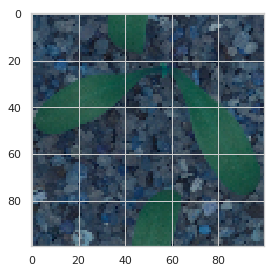

In [11]:
cvc_img = cv2.imread('/content/gdrive/My Drive/ML/Data_set/Plant seedings/train/Sugar beet/00acffa82.png',cv2.IMREAD_COLOR)
imga_resize = cv2.resize(cvc_img,(100,100))
#h = image_preprocessing(imga_resize)
#h = imga_resize
plt.imshow(imga_resize)
plt.show()

In [0]:
x = np.asarray(X)
y = np.asarray(Y)

x = x.astype('float32')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 15,stratify=y)

X_train /= 255
X_test /= 255



In [13]:
np.unique(y_test)
np.unique(y_train)

y_train.shape
y_train = np_utils.to_categorical(y_train, 12)
y_test = np_utils.to_categorical(y_test, 12)

y_train.shape

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

(3796,)

(3796, 12)

In [15]:
X_train.shape
X_test.shape

(3796, 100, 100, 3)

(949, 100, 100, 3)

In [0]:
TRAIN = True
BATCH_SIZE = 50
EPOCHS = 30

In [24]:
model = Sequential()

    # 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(100, 100, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

    # 2nd Conv Layer
model.add(Convolution2D(64, 3, 3))
    # Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(BatchNormalization())


    # 3rd Conv Layer
model.add(Convolution2D(128, 3, 3))
    # Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(BatchNormalization())

    # Fully Connected Layer
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
    # More Dropout
model.add(Dropout(0.5))
model.add(BatchNormalization())



    # Prediction Layer
model.add(Dense(12))
model.add(Activation('softmax'))

    # Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    



# model = Sequential()

# model.add(Convolution2D(filters=64, kernel_size=(3, 3), input_shape=(100, 100, 3), activation='relu'))
# model.add(BatchNormalization(axis=3))
# model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(BatchNormalization(axis=3))
# model.add(Dropout(0.1))

# model.add(Convolution2D(filters=128, kernel_size=(3, 2), activation='relu'))
# model.add(BatchNormalization(axis=3))
# model.add(Convolution2D(filters=128, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(BatchNormalization(axis=3))
# model.add(Dropout(0.1))

# model.add(Convolution2D(filters=256, kernel_size=(5, 5), activation='relu'))
# model.add(BatchNormalization(axis=3))
# model.add(Convolution2D(filters=256, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(BatchNormalization(axis=3))
# model.add(Dropout(0.1))

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(12, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


    # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]
model.fit(X_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
          validation_data=(X_test, y_test), callbacks=callback_list)

Train on 3796 samples, validate on 949 samples
Epoch 1/30
3796/3796 [==============================] - 14s 4ms/step - loss: 1.4173 - acc: 0.5561 - val_loss: 1.0190 - val_acc: 0.6955
Epoch 2/30
3796/3796 [==============================] - 11s 3ms/step - loss: 0.6457 - acc: 0.7937 - val_loss: 0.6557 - val_acc: 0.7987
Epoch 3/30
3796/3796 [==============================] - 11s 3ms/step - loss: 0.4023 - acc: 0.8820 - val_loss: 1.1647 - val_acc: 0.6449
Epoch 4/30
3796/3796 [==============================] - 11s 3ms/step - loss: 0.2763 - acc: 0.9254 - val_loss: 0.6928 - val_acc: 0.7861
Epoch 5/30
3796/3796 [==============================] - 11s 3ms/step - loss: 0.1819 - acc: 0.9521 - val_loss: 0.7529 - val_acc: 0.7545
Epoch 6/30
3796/3796 [==============================] - 11s 3ms/step - loss: 0.1353 - acc: 0.9687 - val_loss: 1.3782 - val_acc: 0.6154
Epoch 7/30
3796/3796 [==============================] - 11s 3ms/step - loss: 0.1057 - acc: 0.9758 - val_loss: 0.5038 - val_acc: 0.8419
Epoch 8/

In [25]:
print("Masked model")

Masked model


In [0]:
#data masked - Dataset
c=0
for i in dir_name:
  if i == 'Black-grass':
    B = os.listdir(path+'/' + i)
    for k in B:
      #print((path+'/' + i+ '/'+ k))
      img = io.imread(path+'/' + i+ '/'+ k)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(image_preprocessing(img_resize))
      Y.append(0)
  elif i =='Cleavers':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img1)
      X.append(image_preprocessing(img_resize))
      Y.append(1)
  elif i =='Common Chickweed':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(image_preprocessing(img_resize))
      Y.append(2)
  elif i =='Common wheat':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(image_preprocessing(img_resize))
      Y.append(3)
  elif i =='Charlock':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(image_preprocessing(img_resize))
      Y.append(4)
  elif i =='Loose Silky-bent':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      if img_resize.shape[2] != 4:
        #print("count ", c + 1)
        X.append(image_preprocessing(img_resize))
        Y.append(5)
  elif i =='Fat Hen':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(image_preprocessing(img_resize))
      Y.append(6)
  elif i =='Maize':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(image_preprocessing(img_resize))
      Y.append(7)
  elif i =='Scentless Mayweed':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(image_preprocessing(img_resize))
      Y.append(8)
  elif i =='Shepherds Purse':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(image_preprocessing(img_resize))
      Y.append(9)
  elif i =='Small-flowered Cranesbill':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(image_preprocessing(img_resize))
      Y.append(10)
  elif i =='Sugar beet':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      #print(path+'/' + i+ '/'+ j)
      #print(imgj)
      #print(imgj.shape)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img2)
      X.append(image_preprocessing(img_resize))
      Y.append(11)

In [0]:
x = np.asarray(X)
y = np.asarray(Y)

x = x.astype('float32')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 15,stratify=y)

X_train /= 255
X_test /= 255

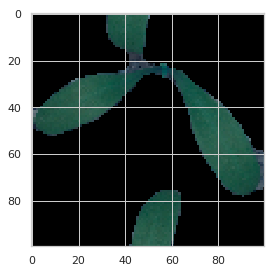

In [34]:
cvc_img = cv2.imread('/content/gdrive/My Drive/ML/Data_set/Plant seedings/train/Sugar beet/00acffa82.png',cv2.IMREAD_COLOR)
imga_resize = cv2.resize(cvc_img,(100,100))
h = image_preprocessing(imga_resize)
#h = imga_resize
plt.imshow(h)
plt.show()

In [35]:
np.unique(y_test)
np.unique(y_train)

y_train.shape
y_train = np_utils.to_categorical(y_train, 12)
y_test = np_utils.to_categorical(y_test, 12)

y_train.shape

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

(3796,)

(3796, 12)

In [36]:
X_train.shape
X_test.shape

(3796, 100, 100, 3)

(949, 100, 100, 3)

In [0]:
TRAIN = True
BATCH_SIZE = 50
EPOCHS = 30

In [38]:
model = Sequential()

    # 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(100, 100, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

    # 2nd Conv Layer
model.add(Convolution2D(64, 3, 3))
    # Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(BatchNormalization())


    # 3rd Conv Layer
model.add(Convolution2D(128, 3, 3))
    # Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(BatchNormalization())

    # Fully Connected Layer
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
    # More Dropout
model.add(Dropout(0.5))
model.add(BatchNormalization())



    # Prediction Layer
model.add(Dense(12))
model.add(Activation('softmax'))

    # Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    



# model = Sequential()

# model.add(Convolution2D(filters=64, kernel_size=(3, 3), input_shape=(100, 100, 3), activation='relu'))
# model.add(BatchNormalization(axis=3))
# model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(BatchNormalization(axis=3))
# model.add(Dropout(0.1))

# model.add(Convolution2D(filters=128, kernel_size=(3, 2), activation='relu'))
# model.add(BatchNormalization(axis=3))
# model.add(Convolution2D(filters=128, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(BatchNormalization(axis=3))
# model.add(Dropout(0.1))

# model.add(Convolution2D(filters=256, kernel_size=(5, 5), activation='relu'))
# model.add(BatchNormalization(axis=3))
# model.add(Convolution2D(filters=256, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(BatchNormalization(axis=3))
# model.add(Dropout(0.1))

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(12, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


    # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]
model.fit(X_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
          validation_data=(X_test, y_test), callbacks=callback_list)

Train on 3796 samples, validate on 949 samples
Epoch 1/30
3796/3796 [==============================] - 13s 3ms/step - loss: 2.6783 - acc: 0.1581 - val_loss: 2.8429 - val_acc: 0.2002
Epoch 2/30
3796/3796 [==============================] - 10s 3ms/step - loss: 2.3841 - acc: 0.1978 - val_loss: 2.3325 - val_acc: 0.2023
Epoch 3/30
3796/3796 [==============================] - 10s 3ms/step - loss: 2.2763 - acc: 0.2139 - val_loss: 2.2201 - val_acc: 0.2097
Epoch 4/30
3796/3796 [==============================] - 10s 3ms/step - loss: 2.2200 - acc: 0.2168 - val_loss: 2.2704 - val_acc: 0.2055
Epoch 5/30
3796/3796 [==============================] - 10s 3ms/step - loss: 2.1530 - acc: 0.2252 - val_loss: 2.2419 - val_acc: 0.2055
Epoch 6/30
3796/3796 [==============================] - 10s 3ms/step - loss: 2.0719 - acc: 0.2555 - val_loss: 2.2448 - val_acc: 0.2076
Epoch 7/30
3796/3796 [==============================] - 10s 3ms/step - loss: 2.0349 - acc: 0.2682 - val_loss: 2.2725 - val_acc: 0.2076
Epoch 8/

In [40]:
print("Below ignore below part")

Below ignore below part


In [0]:
TRAIN = True
BATCH_SIZE = 50
EPOCHS = 30

In [0]:

model = Sequential()

model.add(Convolution2D(filters=64, kernel_size=(5, 5), input_shape=(100, 100, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Convolution2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Convolution2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Convolution2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Convolution2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Convolution2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
          validation_data=(X_test, y_test), callbacks=callback_list)

Train on 3796 samples, validate on 949 samples
Epoch 1/30
3796/3796 [==============================] - 18s 5ms/step - loss: 2.9855 - acc: 0.1546 - val_loss: 3.6884 - val_acc: 0.0643
Epoch 2/30
3796/3796 [==============================] - 11s 3ms/step - loss: 2.6593 - acc: 0.1604 - val_loss: 5.1170 - val_acc: 0.0622
Epoch 3/30
3796/3796 [==============================] - 11s 3ms/step - loss: 2.5513 - acc: 0.1602 - val_loss: 4.6068 - val_acc: 0.0695
Epoch 4/30
3796/3796 [==============================] - 11s 3ms/step - loss: 2.5287 - acc: 0.1565 - val_loss: 2.7865 - val_acc: 0.1928
Epoch 5/30
3796/3796 [==============================] - 11s 3ms/step - loss: 2.4589 - acc: 0.1631 - val_loss: 3.1234 - val_acc: 0.0790
Epoch 6/30
3796/3796 [==============================] - 11s 3ms/step - loss: 2.3912 - acc: 0.1723 - val_loss: 2.6035 - val_acc: 0.1992
Epoch 7/30
3796/3796 [==============================] - 11s 3ms/step - loss: 2.3444 - acc: 0.1805 - val_loss: 2.6547 - val_acc: 0.1043
Epoch 8/

In [0]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 96, 96, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 294912)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               37748864  
_________________________________________________________________
activation_27 (Activation)   (None, 128)               0         
__________

In [0]:
#image generator

(1, 100, 100, 3)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

In [0]:
TRAIN= True

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
if TRAIN:
    model2.fit_generator(datagen.flow(x_train, y_train,
                         batch_size=BATCH_SIZE),
                         samples_per_epoch=x_train.shape[0],
                         nb_epoch=EPOCHS,
                         validation_data=(X_test, y_test), callbacks=callback_list)
    model2.save('./cnn_augment.h5')
else:
    print('Loading pretrained model...')
    model2 = keras.models.load_model('./cnn_augment.h5')
    print('Model Loaded.')

In [0]:
X_train = np.asarray(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

TypeError: ignored

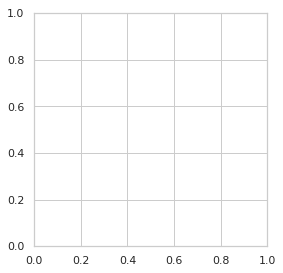

In [0]:
from matplotlib import pyplot as plt
#plt.imshow(thresh_crop)
plt.imshow(np.array(X[:1]))
plt.show()

In [0]:
img.shape
l.shape

(100, 100, 3)

In [0]:
image_preprocessing(img)

TypeError: ignored

In [0]:
type(img)

numpy.ndarray

In [0]:
l.shape

(25, 25, 3)

NameError: ignored

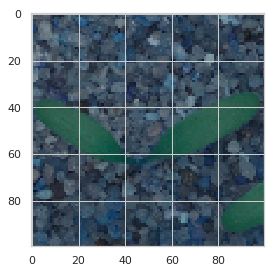

In [0]:
from matplotlib import pyplot as plt
#plt.imshow(thresh_crop)
plt.imshow(l)
plt.show()

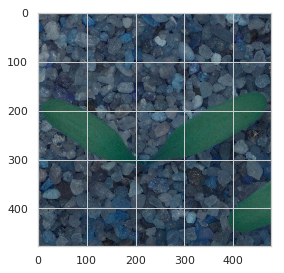

In [0]:
from matplotlib import pyplot as plt
#plt.imshow(thresh_crop)
plt.imshow(img)
plt.show()

In [0]:
blurr = cv2.GaussianBlur(l,(5,5),0)
hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
#GREEN PARAMETERS
lower = (25,40,50)
upper = (75,255,255)
hsv_thres = cv2.inRange(hsv,lower,upper)
struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
#struc = cv2.getStructuringElement(cv2.MORPH_RECT,(,3))
mask = cv2.morphologyEx(hsv_thres,cv2.MORPH_CLOSE,struc)
boolean = mask>0
new = np.zeros_like(l,np.uint8)
new[boolean] = l[boolean]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],


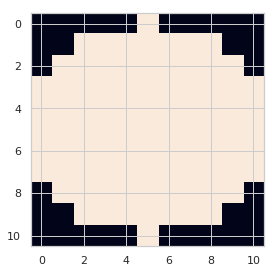

In [0]:
#plt.imshow(thresh_crop)
plt.imshow(struc)
plt.show()

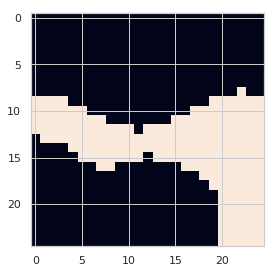

In [0]:
#plt.imshow(thresh_crop)
plt.imshow(mask)
plt.show()

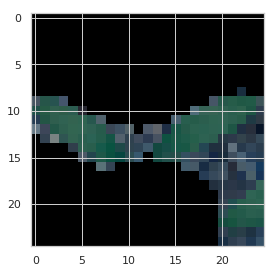

In [0]:
#plt.imshow(thresh_crop)
plt.imshow(new)
plt.show()

In [0]:
new.shape
type(new)

numpy.ndarray

In [0]:
new

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 35,  86,  73],
        [ 30,  86,  70],
        [ 27,  84,  71]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 41,  62,  72],
        [ 30,  50,  66],
        [ 40,  64,  88]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 55,  71,  89],
        [ 32,  56,  81],
        [ 53,  80, 102]]